In [90]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

In [91]:
#Se definen los valores N para los tamaños de los sistemas de ecuaciones que se van a solucionar
valores_prueba = np.array([10,100,200,500,1000,1200,1500,2000,2500,3000,4000,5000])

In [92]:
tiempos=np.zeros((len(valores_prueba),5))
#Se miden los tiempos para cada uno de los valores de N
for i in range(0,len(valores_prueba)):
  for ii in range(0,5):
    matrix=np.random.randint(0,100,size=(valores_prueba[i],valores_prueba[i]))
    vector=np.random.randint(0,100,size=(valores_prueba[i],1))
    solution=np.linalg.solve(matrix,vector)
    solutionf=lambda: np.linalg.solve(matrix,vector)
    result = np.float128(timeit.timeit(stmt=solutionf, globals=globals(), number=10))
    #number en la función anterior puede ponerse con un número menor para que sea más rápido, está configurado con 10 para evitar errores muy altos
    tiempos[i,ii]=result
np.set_printoptions(precision=10, suppress=True)

In [95]:
#Se promedian los tiempos obtenidos y se normalizan, junto con las desviaciones estandar
tiempos_promedio=np.zeros(len(valores_prueba))
error=np.zeros(len(valores_prueba))
for i in range(0,len(valores_prueba)):
  tiempos_promedio[i]=np.mean(tiempos[i,:])
  error[i]=(np.std(tiempos[i,:]))*3

tiempos_promedio=tiempos_promedio/tiempos_promedio[0]
error=error/error[0]

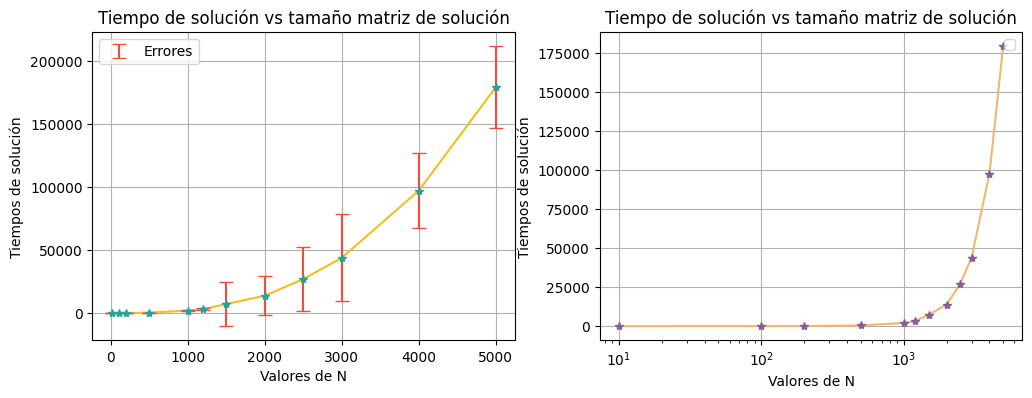

In [96]:
def grafica(x,y):
  fig, axs = plt.subplots(1, 2, figsize=(12, 4))
  axs[0].plot(x,y,marker='*',color='#22A699',zorder=4, linestyle=' ')
  axs[0].plot(x,y,color='#F2BE22',zorder=2, linestyle='-')
  axs[0].errorbar(x, y, yerr=error, capsize=5,ecolor='#F24C3D',zorder=3,linestyle=' ',label="Errores")
  axs[0].set_title('Tiempo de solución vs tamaño matriz de solución')
  axs[0].set_xlabel("Valores de N")
  axs[0].set_ylabel("Tiempos de solución")
  axs[0].legend()
  axs[0].grid(True)
  axs[1].semilogx(x, y,marker='*', color='#836096',linestyle=' ',zorder=3)
  axs[1].semilogx(x, y,color='#F0B86E',linestyle='-',zorder=2)
  axs[1].set_title('Tiempo de solución vs tamaño matriz de solución')
  axs[1].set_xlabel("Valores de N")
  axs[1].set_ylabel("Tiempos de solución")
  axs[1].legend()
  axs[1].grid(True)
  plt.savefig("TiemposvsN.pdf")
grafica(valores_prueba,tiempos_promedio)